In [50]:
import pandas as pd
import seaborn as sns
import folium
from folium.plugins import HeatMap


In [51]:
df = pd.read_csv("Datafiniti_Fast_Food_Restaurants.CSV")
df


,index,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,0,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
1,1,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
2,2,AVwcopQoByjofQCxgfVa,2016-03-29T05:06:36Z,2018-06-26T02:59:52Z,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco..."
3,3,AVweXN5RByjofQCxxilK,2017-01-03T07:46:11Z,2018-06-26T02:59:51Z,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c..."
4,4,AWQ6MUvo3-Khe5l_j3SG,2018-06-26T02:59:43Z,2018-06-26T02:59:43Z,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,Steak 'n Shake,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,AV12gJwna4HuVbed9Ayg,2017-07-24T21:28:46Z,2018-04-07T13:19:06Z,3460 Robinhood Rd,Fast Food Restaurants,Winston-Salem,US,us/nc/winston-salem/3460robinhoodrd/-66712705,36.117563,-80.316553,Pizza Hut,27106,NC,https://www.allmenus.com/nc/winston-salem/7341...,http://www.pizzahut.com
9996,9996,AV12gJxKIxWefVJwhpzS,2017-07-24T21:28:46Z,2018-04-07T13:19:05Z,3069 Kernersville Rd,Fast Food Restaurants,Winston-Salem,US,us/nc/winston-salem/3069kernersvillerd/-66712705,36.077718,-80.176748,Pizza Hut,27107,NC,https://www.allmenus.com/nc/winston-salem/7340...,http://www.pizzahut.com
9997,9997,AVwdJMdSByjofQCxl8Vr,2015-10-24T00:17:32Z,2018-04-07T13:19:05Z,838 S Main St,Fast Food Restaurants,Kernersville,US,us/nc/kernersville/838smainst/-66712705,36.111015,-80.089165,Pizza Hut,27284,NC,https://www.allmenus.com/nc/kernersville/73400...,http://www.pizzahut.com
9998,9998,AVwdl2cykufWRAb57ZPs,2016-04-05T02:59:45Z,2018-04-07T13:19:05Z,1702 Glendale Dr SW,Fast Food Restaurants,Wilson,US,us/nc/wilson/1702glendaledrsw/-66712705,35.719981,-77.945795,Pizza Hut,27893,NC,https://www.allmenus.com/nc/wilson/73403-pizza...,http://www.pizzahut.com


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        10000 non-null  int64  
 1   id           10000 non-null  object 
 2   dateAdded    10000 non-null  object 
 3   dateUpdated  10000 non-null  object 
 4   address      10000 non-null  object 
 5   categories   10000 non-null  object 
 6   city         10000 non-null  object 
 7   country      10000 non-null  object 
 8   keys         10000 non-null  object 
 9   latitude     10000 non-null  float64
 10  longitude    10000 non-null  float64
 11  name         10000 non-null  object 
 12  postalCode   10000 non-null  object 
 13  province     10000 non-null  object 
 14  sourceURLs   10000 non-null  object 
 15  websites     10000 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 1.2+ MB


In [53]:
plot_1 = pd.DataFrame(df.groupby(by='province').id.count())
plot_1= plot_1.sort_values("id", ascending=False)
plot_1

state_head = plot_1.head(10)
state_tail = plot_1.tail(10)

<AxesSubplot: xlabel='province'>

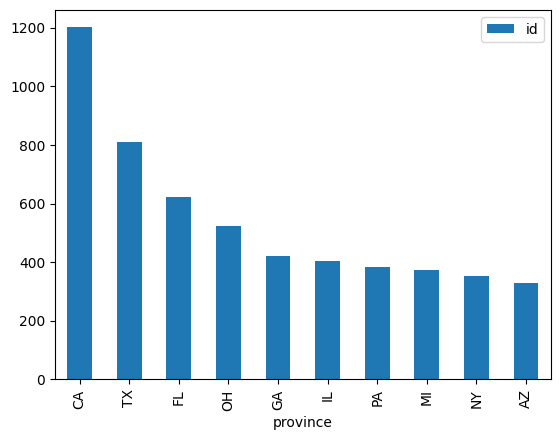

In [54]:
state_head.plot(kind='bar')

<AxesSubplot: xlabel='province'>

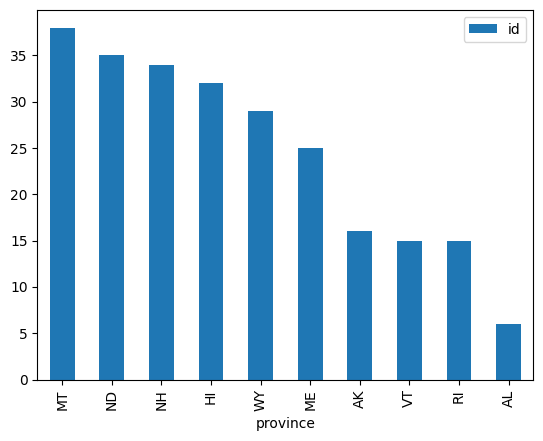

In [55]:
state_tail.plot(kind='bar')

In [56]:
plot_2 = pd.DataFrame(df.groupby(by='name').id.count())
plot_2= plot_2.sort_values("id", ascending=False).head(20)
plot_2

,id
name,
McDonald's,1898
Taco Bell,1032
Burger King,833
Subway,776
Arby's,663
Wendy's,628
Jack in the Box,330
Pizza Hut,230
Dairy Queen,218


<AxesSubplot: ylabel='name'>

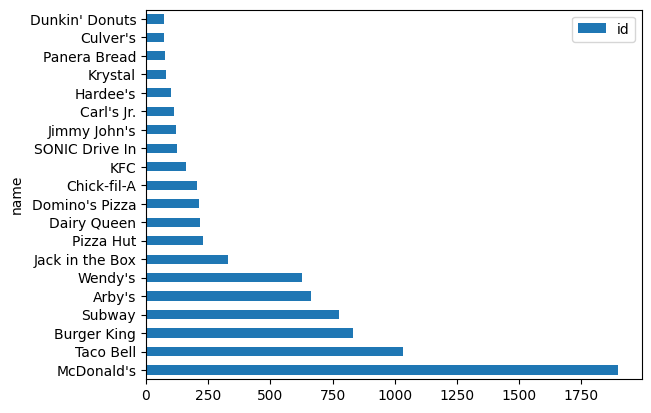

In [57]:
plot_2.plot(kind="barh")

In [58]:
dominoes = df[df["name"] == "Domino's Pizza" ]
dominoes = HeatMap(set(zip(dominoes.latitude.values,dominoes.longitude.values)))
dp_map = folium.Map(location=[37,-99])
dp_map.add_child(dominoes)
dp_map

In [59]:

pizza_hut = df[df["name"] == "Pizza Hut" ]
pizza_hut = HeatMap(set(zip(pizza_hut.latitude.values,pizza_hut.longitude.values)))
ph_map = folium.Map(location=[37,-99])
ph_map.add_child(pizza_hut)
ph_map


In [60]:
mcdonalds = df[df["name"] == "McDonald's" ]
mcdonalds = HeatMap(set(zip(mcdonalds.latitude.values,mcdonalds.longitude.values)))
mc_map = folium.Map(location=[37,-99])
mc_map.add_child(mcdonalds)
mc_map

In [61]:
burgerK = df[df["name"] == "Burger King" ]
burgerK = HeatMap(set(zip(burgerK.latitude.values,burgerK.longitude.values)))
bk_map = folium.Map(location=[37,-99])
bk_map.add_child(burgerK)
bk_map
